In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

In [2]:
# Load the Fashion-MNIST Dataset
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [3]:
# Print the shape of the training data
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[9])

5


In [5]:
# Rescale the image values so that they lie in between 0 an 1
train_images = train_images/255.
test_images = test_images/255.

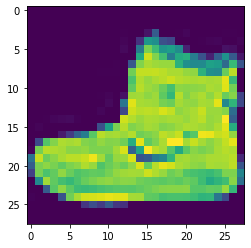

Label : Ankle boot


In [6]:
# Display one of the images
i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"Label : {labels[train_labels[i]]}")

In [7]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


### Compile Method

In [9]:
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

In [10]:
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=[acc, mae])

In [11]:
history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256, verbose=2)

Epoch 1/8
235/235 - 4s - loss: 0.5663 - sparse_categorical_accuracy: 0.8055 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 - 4s - loss: 0.3997 - sparse_categorical_accuracy: 0.8586 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 - 4s - loss: 0.3864 - sparse_categorical_accuracy: 0.8626 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 - 4s - loss: 0.3745 - sparse_categorical_accuracy: 0.8662 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 - 4s - loss: 0.3716 - sparse_categorical_accuracy: 0.8675 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 - 4s - loss: 0.3688 - sparse_categorical_accuracy: 0.8684 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 - 4s - loss: 0.3661 - sparse_categorical_accuracy: 0.8672 - mean_absolute_error: 4.4200
Epoch 8/8
235/235 - 4s - loss: 0.3639 - sparse_categorical_accuracy: 0.8689 - mean_absolute_error: 4.4200


In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(history.history)
df

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.566337,0.805483,4.420001
1,0.399683,0.858583,4.420000
2,0.386367,0.862567,4.420001
3,0.374514,0.866217,4.420000
4,0.371589,0.867467,4.420001
5,0.368799,0.868383,4.420002
6,0.366075,0.867217,4.420001
7,0.363884,0.868867,4.420001


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

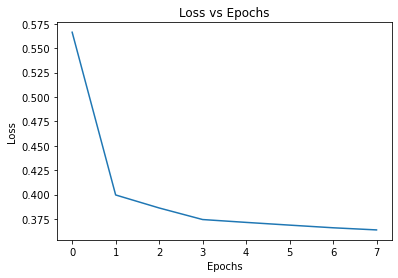

In [14]:
# Make a Plot for the loss function
loss_plot = df.plot(y='loss', title='Loss vs Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

In [15]:
%%javascript
<!--Save the Notebook-->
IPython.notebook.save_checkpoint();

<IPython.core.display.Javascript object>